## Questions

the focus is to obtain some specific data on skill migration among low income countries, and to predict the skill migration trends in each country for 2020 

- list of countries classified as low income by the world bank
- which skill group category had positive migration in 2019 
- which industry and country had the most positive migration in 2019
- list of countries with positive skill migration in 2019
- skill migration in countries with more the 1k per 10k in 2019 vs 2015
- predict skill migration per 10k for 2020
- which country will have the most skill migration in skills that had positive migration in 2019 for 2020

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import Holt

# supress annoying warning
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# set the size for all figures
plt.rcParams['figure.figsize'] = [14, 7]

In [149]:
# load in the dataset
talent_mg_skill = pd.read_excel("../input/linkedin-digital-data/public_use-talent-migration.xlsx", sheet_name="Skill Migration")

In [93]:
# get countries with low income
countries_low = talent_mg_skill[talent_mg_skill["wb_income"] == "Low income"]

In [94]:
print("list of countries classified as low income:")
for country in countries_low["country_name"].unique():
    print(country)

list of countries classified as low income:
Afghanistan
Benin
Burkina Faso
Congo, Dem. Rep.
Ethiopia
Haiti
Madagascar
Malawi
Mali
Mozambique
Nepal
Rwanda
Senegal
Syrian Arab Republic
Tanzania
Togo
Uganda
Yemen, Rep.
Zimbabwe


In [74]:
# get industries which had positive migration in 2019
pos_2019 = countries_low[countries_low["net_per_10K_2019"] > 0]

In [90]:
print("list of skill group with positive migration in 2019:")
for group in pos_2019["skill_group_category"].unique():
    print(group)
    

list of skill group with positive migration in 2019:
Business Skills
Specialized Industry Skills
Tech Skills
Disruptive Tech Skills
Soft Skills


In [86]:
pos_2019[pos_2019["net_per_10K_2019"] == pos_2019["net_per_10K_2019"].max()]

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
107,af,Afghanistan,Low income,South Asia,827,Specialized Industry Skills,Automotive,-726.39,-99.97,-479.23,-126.45,518.73


the automotive industry in afghanstan had the most growth in 2019 compared to other skill groups, from this we can also infer that the Specialized Industry Skills category had the most growth of all groups in 2019

In [268]:
# group rows by country
country_mg_2019 = pos_2019.groupby("country_name").sum()

In [269]:
# lets take a look at each country in numbers
country_mg_2019

,skill_group_id,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
country_name,,,,,,
Afghanistan,10549,-2487.43,-1295.07,-1406.04,284.92,585.78
Burkina Faso,4349,-303.68,475.66,-63.77,-96.72,140.30
"Congo, Dem. Rep.",267110,15921.11,5191.17,-608.96,569.27,4348.39
Ethiopia,43143,653.31,-207.12,-1726.96,-1796.52,554.37
Madagascar,34054,790.39,-220.53,-1227.28,-703.36,322.82
Malawi,112564,3260.79,4743.21,-208.35,-597.27,618.25
Mali,142676,9017.98,5482.09,2333.82,532.32,2081.85
Mozambique,237709,5390.04,-5692.43,-6644.60,-2357.83,4048.02
Nepal,36235,417.14,288.91,-178.06,-101.40,597.68


In [270]:
country_mg_2019["net_per_10K_2019"]

country_name
Afghanistan              585.78
Burkina Faso             140.30
Congo, Dem. Rep.        4348.39
Ethiopia                 554.37
Madagascar               322.82
Malawi                   618.25
Mali                    2081.85
Mozambique              4048.02
Nepal                    597.68
Rwanda                  3187.22
Senegal                 5335.45
Syrian Arab Republic       9.12
Tanzania                 284.23
Togo                       9.87
Uganda                   261.38
Yemen, Rep.              324.38
Name: net_per_10K_2019, dtype: float64

lets plot countries which have more than 1000 migration on every 10k

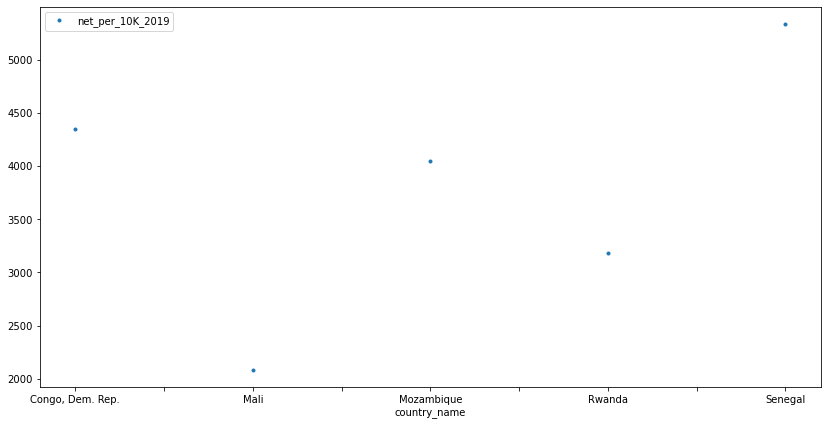

In [271]:
country_mg_2019[country_mg_2019["net_per_10K_2019"] > 1000].plot(y=["net_per_10K_2019"], style=".")

we can see that sengal had the most skill migration in 2019 compared to other countries
now lets compare these numbers to 2015 for example

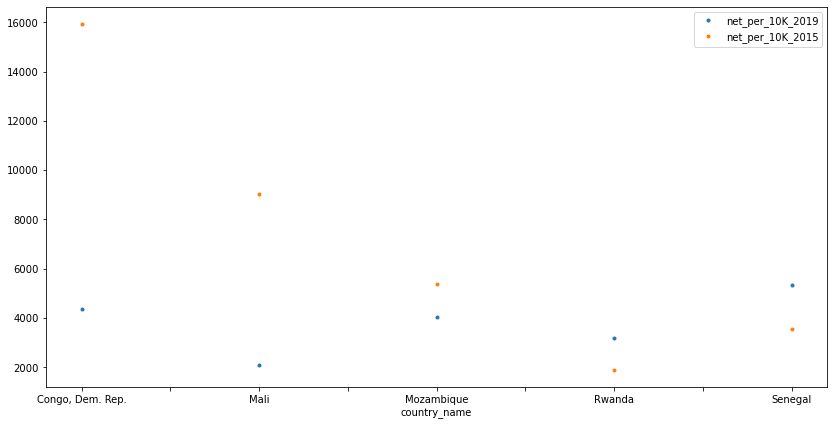

In [148]:
country_mg_2019[country_mg_2019["net_per_10K_2019"] > 1000].plot(y=["net_per_10K_2019", "net_per_10K_2015"], style=".")

skill migration in countries with more than 1000 per 10k skill migration has drastically changes compared to 2015, for example in the Congo and Mali people are far less likely to migrate industries in 2019 compared to 2015 this could indicate a stability in the job market and that people are now settling to a specific field, in contrast more people are migrating to other industries in 2019 compared to 2015 in Senegal indicating a shift in the job market

In [218]:
''' 
Holt's (Method) Exponential Smoothing for predicting next value based on previous years values,
also known as forecasting
'''

def hes_predict(train):
    model = Holt(train)
    model_fit = model.fit()
    fcast = model_fit.forecast()
    return fcast[0]

In [255]:
countries_2020 = pd.DataFrame(columns = ["net_per_10k_2020"], index = country_mg_2019.index)

for country in country_mg_2019.index:
    
    # take previous numbers for country as model input
    train = country_mg_2019.drop("skill_group_id", axis=1)[country_mg_2019.index == f"{country}"].to_numpy()
    
    # get model prediciton and round to 2 decimal places
    result = round(hes_predict(train[0]), 2)
    
    # save model prediction to dataframe 
    countries_2020["net_per_10k_2020"][f"{country}"] = result
    
    # print prediction results
    print(f"{country} skill migration per 10k for 2020 = {result}\n")
    

Afghanistan skill migration per 10k for 2020 = 566.64
Burkina Faso skill migration per 10k for 2020 = 69.35
Congo, Dem. Rep. skill migration per 10k for 2020 = 5297.78
Ethiopia skill migration per 10k for 2020 = 2904.68
Madagascar skill migration per 10k for 2020 = 1349.0
Malawi skill migration per 10k for 2020 = 1700.94
Mali skill migration per 10k for 2020 = -893.72
Mozambique skill migration per 10k for 2020 = 9463.79
Nepal skill migration per 10k for 2020 = 359.15
Rwanda skill migration per 10k for 2020 = 1042.21
Senegal skill migration per 10k for 2020 = 2587.35
Syrian Arab Republic skill migration per 10k for 2020 = 281.75
Tanzania skill migration per 10k for 2020 = 51.54
Togo skill migration per 10k for 2020 = 0.1
Uganda skill migration per 10k for 2020 = 101.82
Yemen, Rep. skill migration per 10k for 2020 = 389.26


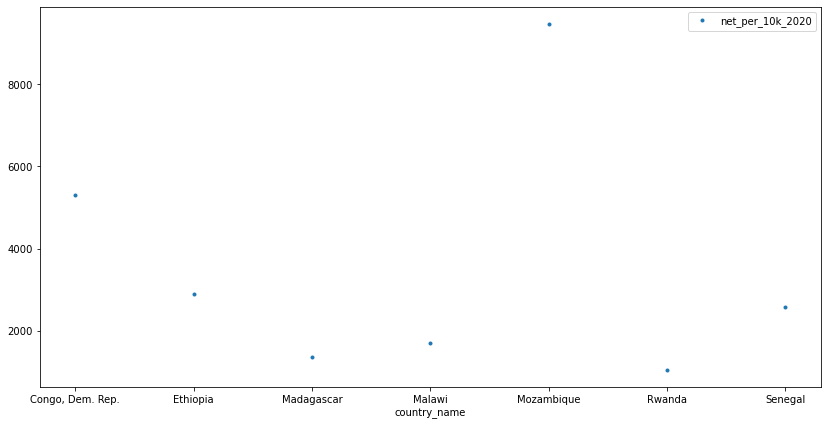

In [262]:
# again plot countries where its more than 1k
countries_2020[countries_2020["net_per_10k_2020"] > 1000].plot(style=".")

from the model predicitions we can see that the job market will have a major shift in 2020 in Mozambique, with almost all 10k shifting between skills, previous year's leading to a very unstable job market high, last years highest migration was in Senegal with over 5k migrants per 10k, for 2020 the market seems to be stabilizing and people are settling into jobs leading to less than 3k migrants.

in conclusion. the market has changed significantly for the past years in low income countries, some of the countries had positive skill migration meaning an unstable market where workers do not settle for a specific field, while other countries had negative migration compared to previous years leading to a more stable market which can be interpreted as a good measure of market stability and quality of work for those workers